<a href="https://colab.research.google.com/github/aarati0122/Sentiment-Analysis/blob/main/sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Sentiment analysis is the peocess of determining whether a piece of writing is positive ,negative or neutral
# analysis of textual lik NLP
# based on laxicon approach 
# library use vederSentiment
!pip install ipython-autotime
%load_ext autotime


time: 2.16 ms (started: 2021-05-05 08:01:01 +00:00)


In [2]:
#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")


from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.feature_extraction.text import TfidfVectorizer

import datetime

time: 1.35 s (started: 2021-05-05 08:01:01 +00:00)


In [3]:
  !pip install vaderSentiment

     |████████████████████████████████| 133kB 3.0MB/s 
time: 3.25 s (started: 2021-05-05 08:01:02 +00:00)


In [4]:
# call library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vs = SentimentIntensityAnalyzer()

time: 24.1 ms (started: 2021-05-05 08:01:05 +00:00)


In [5]:
text = 'this is flower is really great!!'
vs.polarity_scores(text)

{'compound': 0.7164, 'neg': 0.0, 'neu': 0.501, 'pos': 0.499}

time: 6.5 ms (started: 2021-05-05 08:01:06 +00:00)


In [6]:
text1 = "Commonly used to describe a person who doesn't pick sides in disputes,"
vs.polarity_scores(text1)

{'compound': -0.2732, 'neg': 0.16, 'neu': 0.84, 'pos': 0.0}

time: 4.48 ms (started: 2021-05-05 08:01:06 +00:00)


In [7]:
text2 = 'this session was not interesting'
vs.polarity_scores(text2)

{'compound': -0.3089, 'neg': 0.361, 'neu': 0.639, 'pos': 0.0}

time: 4.64 ms (started: 2021-05-05 08:01:06 +00:00)


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os

time: 217 ms (started: 2021-05-05 08:01:06 +00:00)


In [9]:
# creating data
url = 'https://inshorts.com/en/read/technology'
# stored values
news_data = []
news_category = url.split('/')[-1]
# to request and stored in data varibale
# in BeautifulSoup having the finds all methode to find understandable data 
data = requests.get(url)
soup = BeautifulSoup(data.content)
print(soup)

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
    /* The Modal (background) */
    .modal_contact {
        display: none; /* Hidden by default */
        position: fixed; /* Stay in place */
        z-index: 8; /* Sit on top */
        left: 0;
        top: 0;
        width: 100%; /* Full width */
        height: 100%;
        overflow: auto; /* Enable scroll if needed */
        background-color: rgb(0,0,0); /* Fallback color */
        background-color: rgba(0,0,0,0.4); /* Black w/ opacity */
    }

    /* Modal Content/Box */
    .modal-content {
        background-color: #fefefe;
        margin: 15% auto;
        padding: 20px !important;
        padding-top: 0 !important;
        /* border: 1px solid #888; */
        text-align: center;
        position: relative;
        border-radius: 6px;
    }

    /* The Close Button */
    .close {
      left: 90%;
      color: #aaa;
      float: right;
      font-size: 28px;
      font-weight: bold;
    /* positio

In [10]:
# creating data
urls = ['https://inshorts.com/en/read/technology','https://inshorts.com/en/read/world','https://inshorts.com/en/read/national']
# stored values
def build_dataset(urls):
  news_data = []
  for url in urls:
    news_category = url.split('/')[-1]
    data = requests.get(url)
    soup = BeautifulSoup(data.content)
    
    news_articles = [{'news_headline':headline.find('span',attrs={"itemprop":"headline"}).string,
                      'news_article':article.find('div',attrs={"itemprop":"articleBody"}).string,
                      'news_category':news_category}
                     for headline,article in zip(soup.find_all('div',class_ =["news-card-title news-right-box"]),
                                                 soup.find_all('div',class_ =["news-card-content news-right-box"])
                                                 ) #zip methode returns tuple ,List comprehension it used to write shortest syntax
                     ]
    news_articles =news_articles[0:20]
    news_data.extend(news_articles)

  df =  pd.DataFrame(news_data)
  df = df[['news_headline','news_article','news_category']]
  return df



time: 42.7 ms (started: 2021-05-05 08:01:06 +00:00)


In [11]:
df =  build_dataset(urls)
df.head()

,news_headline,news_article,news_category
0,Twitter issues statement after permanently sus...,Twitter has permanently suspended Kangana Rana...,technology
1,Melinda refuses spousal support from Bill Gate...,Melinda Gates officially filed for divorce fro...,technology
2,Bill Gates had an 'agreement' with wife Melind...,"Bill Gates, who announced his divorce with Mel...",technology
3,SMS worm that tricks Android users into downlo...,A malware said to be targeting Android users i...,technology
4,"Challenging stretch of time: Bill, Melinda Gat...",As Bill and Melinda Gates announced their divo...,technology


time: 1.57 s (started: 2021-05-05 08:01:07 +00:00)


In [12]:
df =  build_dataset(urls)
df.tail()

,news_headline,news_article,news_category
55,Air India assures jabs for all by May-end as p...,Air India has said that it will start a vaccin...,national
56,"PPE kits don't help in heat, they shrivel: Noi...","Amid the current COVID-19 situation, the worke...",national
57,No decrease in number of tests: Tope on dip in...,Dismissing fewer tests as the reason behind th...,national
58,Man held for selling empty vial of COVID-19 va...,A man has been arrested for selling an empty v...,national
59,"Isolation coaches admitted 146 COVID patients,...",Ministry of Railways said that 146 COVID-19 pa...,national


time: 3.12 s (started: 2021-05-05 08:01:08 +00:00)


In [13]:
# create the csv file
df.to_csv('news.csv',index =False) 

time: 7.82 ms (started: 2021-05-05 08:01:11 +00:00)


In [14]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/aarati0122/Datasets/main/news.csv')
df

,news_headline,news_article,news_category
0,CoWIN server crashes as vaccine registration o...,"The servers of CoWIN website, UMANG app and Aa...",technology
1,Seeing traffic of 55k hits per sec: CoWIN chie...,After COVID-19 vaccine registration opened for...,technology
2,18+ people complain of finding vaccine slots f...,After registration for COVID-19 vaccine opened...,technology
3,How can one register for COVID-19 vaccination ...,Registration for COVID-19 vaccination can be d...,technology
4,Facebook 'mistakenly' hides #ResignModi posts;...,Facebook has issued a statement after it hid p...,technology
5,Musk jokes Bezos' Blue Origin 'can't get it up...,SpaceX CEO Elon Musk took a dig at Jeff Bezos'...,technology
6,30-year-old man buys Google's Argentina domain...,A 30-year-old web designer managed to successf...,technology
7,Apple's March quarter revenue hits record $89....,Apple posted record March quarter revenue of $...,technology
8,Samsung family to pay $10.78 bn in S Korea's l...,The family of late Samsung Chairman Lee Kun-he...,technology
9,Sharing vaccine recipes with others won't help...,Bill Gates in an interview said sharing vaccin...,technology


time: 235 ms (started: 2021-05-05 08:01:11 +00:00)


In [15]:
# Preprocessing
# cleaning the textual data
# html tags
# stopwords - like is ,the 
# punctuation removal
# lower casing 
# Accented characters 
# contractions
# steaming/lemmatization


time: 2.84 ms (started: 2021-05-05 08:01:11 +00:00)


In [16]:
import nltk #this library is a natural langauge toolkit ,using the to remove the stopword
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove("not")
len(stopword_list)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


178

time: 883 ms (started: 2021-05-05 08:01:12 +00:00)


In [17]:
# remove html tag

def html_tag(text):
  soup = BeautifulSoup(text,"html.parser")
  new_text =soup.get_text()
  return new_text

html_tag('<html> important notes</html>')

' important notes'

time: 6.74 ms (started: 2021-05-05 08:01:12 +00:00)


In [18]:
!pip install contractions

     |████████████████████████████████| 286kB 3.6MB/s 
     |████████████████████████████████| 327kB 5.0MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85396 sha256=9aa4c2bb487ffd6f3e1fb913c835038395f89139b412732d646a1609be6fd912
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick
time: 7.17 s (started: 2021-05-05 08:01:12 +00:00)


In [19]:
# Expand contraction - it expand the shortcut words 

import contractions

def con(text):
    expand = contractions.fix(text)
    return expand
  
con("u all can't expand I'd think")

'you all can not expand I would think'

time: 19.3 ms (started: 2021-05-05 08:01:20 +00:00)


In [20]:
# special character removal
import re

def remove_sp(text):
  pattern = r'[^A-Za-z0-9\s]'
  text = re.sub(pattern,'',text)
  return text

remove_sp("where are you going ? @$$@")

'where are you going  '

time: 9.45 ms (started: 2021-05-05 08:01:20 +00:00)


In [21]:
from nltk.tokenize.toktok import ToktokTokenizer

tokenizer = ToktokTokenizer()

time: 1.86 ms (started: 2021-05-05 08:01:20 +00:00)


In [22]:
# remove the stopwords

def remove_stopword(text):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  filtered_tokens =[token for token in tokens if token not in stopword_list]
  filtered_text = ' '.join(filtered_tokens)
  return tokens

remove_stopword("the, and, not are the stop words ")

['the', ',', 'and', ',', 'not', 'are', 'the', 'stop', 'words']

time: 9.84 ms (started: 2021-05-05 08:01:20 +00:00)


In [23]:
df.news_headline = df.news_headline.apply(lambda x:x.lower())
df.news_article = df.news_headline.apply(lambda x:x.lower())

df.news_headline = df.news_headline.apply(html_tag)
df.news_headline = df.news_headline.apply(html_tag)

df.news_headline = df.news_headline.apply(con)
df.news_headline = df.news_headline.apply(con)


df.news_headline = df.news_headline.apply(remove_sp)
df.news_headline = df.news_headline.apply(remove_sp)

df.news_headline = df.news_headline.apply(remove_stopword)
df.news_headline = df.news_headline.apply(remove_stopword)

time: 61.6 ms (started: 2021-05-05 08:01:20 +00:00)


In [24]:
df.head()

,news_headline,news_article,news_category
0,"[[, ', cowin, ', ,, ', server, ', ,, ', crashe...",cowin server crashes as vaccine registration o...,technology
1,"[[, ', seeing, ', ,, ', traffic, ', ,, ', of, ...",seeing traffic of 55k hits per sec: cowin chie...,technology
2,"[[, ', 18, ', ,, ', people, ', ,, ', complain,...",18+ people complain of finding vaccine slots f...,technology
3,"[[, ', how, ', ,, ', can, ', ,, ', one, ', ,, ...",how can one register for covid-19 vaccination ...,technology
4,"[[, ', facebook, ', ,, ', mistakenly, ', ,, ',...",facebook 'mistakenly' hides #resignmodi posts;...,technology


time: 23.6 ms (started: 2021-05-05 08:01:20 +00:00)


In [25]:
data_ploarity =df['news_article'].apply(lambda x: vs.polarity_scores(x))
data_ploarity.head()

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.152, 'neu': 0.732, 'pos': 0.116, 'co...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.438, 'neu': 0.562, 'pos': 0.0, 'comp...
Name: news_article, dtype: object

time: 17.3 ms (started: 2021-05-05 08:01:20 +00:00)


In [26]:
df['compound'] = df['news_article'].apply(lambda x: vs.polarity_scores(x)['compound'])
# df['positiov'] = df['news_article'].apply(lambda x: vs.polarity_scores(x)['positive'])

time: 14 ms (started: 2021-05-05 08:01:20 +00:00)


In [27]:
df.head()

,news_headline,news_article,news_category,compound
0,"[[, ', cowin, ', ,, ', server, ', ,, ', crashe...",cowin server crashes as vaccine registration o...,technology,0.0000
1,"[[, ', seeing, ', ,, ', traffic, ', ,, ', of, ...",seeing traffic of 55k hits per sec: cowin chie...,technology,0.0000
2,"[[, ', 18, ', ,, ', people, ', ,, ', complain,...",18+ people complain of finding vaccine slots f...,technology,-0.1531
3,"[[, ', how, ', ,, ', can, ', ,, ', one, ', ,, ...",how can one register for covid-19 vaccination ...,technology,0.0000
4,"[[, ', facebook, ', ,, ', mistakenly, ', ,, ',...",facebook 'mistakenly' hides #resignmodi posts;...,technology,-0.4404


time: 31.1 ms (started: 2021-05-05 08:01:20 +00:00)


In [28]:
df.loc[df['compound'] > -0.05 , 'sentiment'] = 'neutral' 
df.loc[df['compound'] <= -0.05, 'sentiment'] = 'negative' 
df.loc[df['compound'] >= 0.05, 'sentiment'] = 'positive' 
df = df[["news_article","sentiment","compound"]]
df.head()

,news_article,sentiment,compound
0,cowin server crashes as vaccine registration o...,neutral,0.0000
1,seeing traffic of 55k hits per sec: cowin chie...,neutral,0.0000
2,18+ people complain of finding vaccine slots f...,negative,-0.1531
3,how can one register for covid-19 vaccination ...,neutral,0.0000
4,facebook 'mistakenly' hides #resignmodi posts;...,negative,-0.4404


time: 46.3 ms (started: 2021-05-05 08:01:20 +00:00)


In [29]:
pd.DataFrame(round(df.sentiment.value_counts(ascending=False, normalize=True),2))

,sentiment
neutral,0.48
negative,0.32
positive,0.20


time: 15.7 ms (started: 2021-05-05 08:01:20 +00:00)


In [30]:
positive = len(df[df["sentiment"]=="positive"])
negative = len(df[df["sentiment"]=="negative"])
neutral = len(df[df["sentiment"]=="neutral"])

time: 5.77 ms (started: 2021-05-05 08:01:20 +00:00)


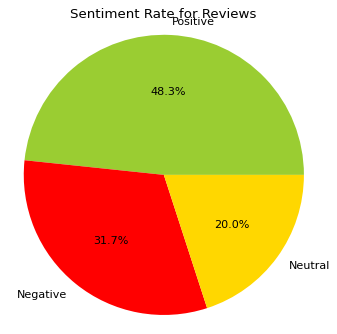

time: 116 ms (started: 2021-05-05 08:01:20 +00:00)


In [31]:
import matplotlib.pyplot as plt
pie_sentiment = df.sentiment.value_counts(normalize=True)
plt.figure(figsize=(5,5),dpi=80)
labels = 'Positive','Negative',"Neutral"
colors = ['yellowgreen', 'red','gold']
plt.pie(pie_sentiment, colors=colors,labels=labels,autopct='%1.1f%%')
plt.style.use('default')
plt.title('Sentiment Rate for Reviews')
plt.axis('equal')
sizes = [positive, neutral, negative]
plt.show()

In [32]:
x = df.news_article
y = df.sentiment

time: 1.89 ms (started: 2021-05-05 08:01:20 +00:00)


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

time: 7.07 ms (started: 2021-05-05 08:01:20 +00:00)


In [34]:
print(x_train.shape)
print(x_test.shape)

(45,)
(15,)
time: 3.93 ms (started: 2021-05-05 08:01:20 +00:00)


In [35]:
print("Total records: ",len(df))
print("Train records: ",len(x_train))
print("Test records : ",len(x_test))

Total records:  60
Train records:  45
Test records :  15
time: 4.64 ms (started: 2021-05-05 08:01:20 +00:00)


In [36]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

x_train_cv1 = cv1.fit_transform(x_train)
x_test_cv1  = cv1.transform(x_test)

pd.DataFrame(x_train_cv1.toarray(), columns=cv1.get_feature_names()).sample(10)

,000,10,100,114,14,150,18,19,1st,200,24,30,32,3d,41,44,555,55k,60,645,78,89,agony,american,amid,apartment,apple,apply,argentina,asking,asks,assam,assistance,beds,begins,believes,bengaluru,better,bezos,big,...,statement,steepens,strongest,super,supplies,supply,support,supported,surges,switched,taiwan,talk,taxes,team,term,tesla,thanks,ticket,till,today,traffic,trump,tweets,uk,units,used,vaccination,vaccine,value,ve,vp,weekend,win,wishing,woke,woman,won,worth,year,years
40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


time: 184 ms (started: 2021-05-05 08:01:20 +00:00)


In [37]:
# The second document-term matrix has both unigrams and bigrams, and indicators instead of counts
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

x_train_cv2 = cv2.fit_transform(x_train)
x_test_cv2  = cv2.transform(x_test)

pd.DataFrame(x_train_cv2.toarray(), columns=cv2.get_feature_names()).head()

,000,000 covid,10,10 78,100,100 million,114,114 year,14,14 555,150,150 oxygen,18,19,19 cases,19 crisis,19 deaths,19 earthquakes,19 held,19 isn,19 material,19 support,19 vaccination,19 ve,1st,1st 3d,200,24,24 hours,30,30 elon,30 year,32,32 crore,3d,3d printed,41,41 bn,44,555,...,till,today,today mumbai,traffic,traffic 55k,trump,trump lawyer,tweets,uk,uk send,units,units india,used,used humans,vaccination,vaccination centres,vaccination registration,vaccination win,vaccine,vaccine recipes,vaccine registration,value,ve,ve people,vp,weekend,win,wishing,wishing depart,woke,woke sex,woman,woman oldest,won,won help,worth,worth 100,year,year old,years
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


time: 121 ms (started: 2021-05-05 08:01:20 +00:00)


In [38]:
# Create a logistic regression model to use

lr = LogisticRegression()
# Train the first model
lr.fit(x_train_cv1, y_train)
y_pred_cv1 = lr.predict(x_test_cv1)
print("kNN confusion matrix: \n\n", confusion_matrix(y_test, y_pred_cv1))


kNN confusion matrix: 

 [[2 4 1]
 [0 6 0]
 [0 2 0]]
time: 45.1 ms (started: 2021-05-05 08:01:21 +00:00)


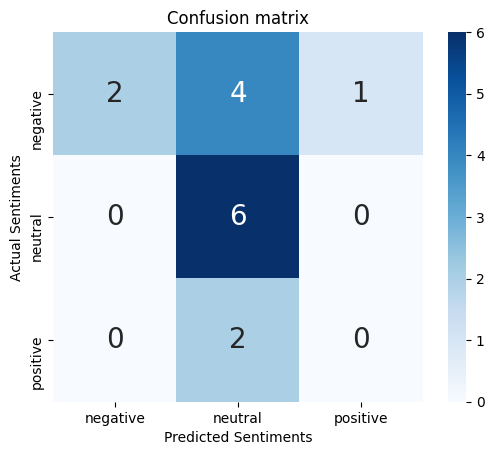

time: 233 ms (started: 2021-05-05 08:01:21 +00:00)


In [39]:
# Print confusion matrix for kNN
confusion = confusion_matrix(y_test, y_pred_cv1)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

In [40]:
accuracy = accuracy_score(y_test, y_pred_cv1)
f1 = f1_score(y_test, y_pred_cv1,average='weighted')
precision = precision_score(y_test, y_pred_cv1,average='weighted')
recall = recall_score(y_test, y_pred_cv1,average='weighted')
cm1 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))

Accuracy: 53.33%
Precision: 66.67%
Recall: 53.33%
F1 Score: 47.41%
time: 15.1 ms (started: 2021-05-05 08:01:21 +00:00)


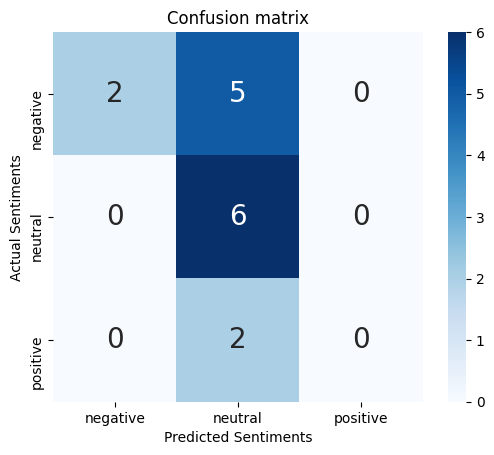

Accuracy: 53.33%
Precision: 65.13%
Recall: 53.33%
F1 Score: 46.00%
time: 266 ms (started: 2021-05-05 08:01:21 +00:00)


In [41]:
# Train the second model
lr = LogisticRegression()
lr.fit(x_train_cv2, y_train)
y_pred_cv2 = lr.predict(x_test_cv2)


# Print confusion matrix for kNN
confusion = confusion_matrix(y_test, y_pred_cv2)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

# Print Sklearn Metrices
accuracy = accuracy_score(y_test, y_pred_cv2)
f1 = f1_score(y_test, y_pred_cv2,average='weighted')
precision = precision_score(y_test, y_pred_cv2,average='weighted')
recall = recall_score(y_test, y_pred_cv2,average='weighted')
cm2 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))

In [42]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LR1-CV', 'LR2-CV-Ngr']
round(results,3)

,LR1-CV,LR2-CV-Ngr
Accuracy,0.533,0.533
Precision,0.667,0.651
Recall,0.533,0.533
F1 Score,0.474,0.460


time: 18.3 ms (started: 2021-05-05 08:01:21 +00:00)


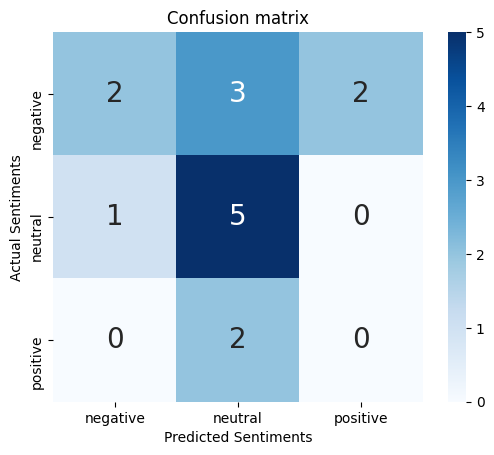

Accuracy: 46.67%
Precision: 51.11%
Recall: 46.67%
F1 Score: 43.67%
time: 240 ms (started: 2021-05-05 08:01:21 +00:00)


In [43]:
# Fit the first Naive Bayes model

mnb = MultinomialNB()
mnb.fit(x_train_cv1, y_train)
y_pred_cv1_nb = mnb.predict(x_test_cv1)

# Print confusion matrix for kNN
confusion = confusion_matrix(y_test, y_pred_cv1_nb)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

# Print Sklearn Metrices
accuracy = accuracy_score(y_test, y_pred_cv1_nb)
f1 = f1_score(y_test, y_pred_cv1_nb,average='weighted')
precision = precision_score(y_test, y_pred_cv1_nb,average='weighted')
recall = recall_score(y_test, y_pred_cv1_nb,average='weighted')
cm3 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))

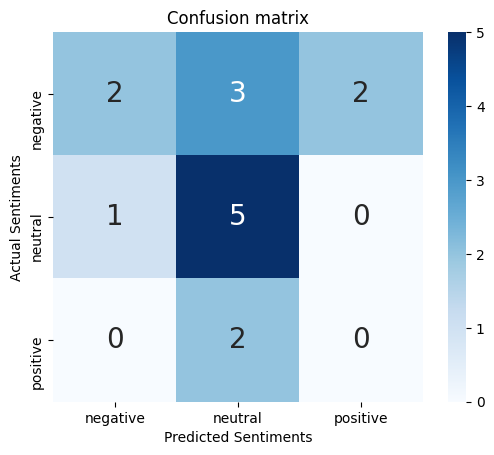

Accuracy: 46.67%
Precision: 51.11%
Recall: 46.67%
F1 Score: 43.67%
time: 234 ms (started: 2021-05-05 08:01:22 +00:00)


In [44]:
# Fit the second Naive Bayes model
mnb = MultinomialNB()
mnb.fit(x_train_cv2, y_train)

y_pred_cv2_nb = mnb.predict(x_test_cv2)

confusion = confusion_matrix(y_test, y_pred_cv2_nb)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

accuracy = accuracy_score(y_test, y_pred_cv2_nb)
f1 = f1_score(y_test, y_pred_cv2_nb,average='weighted')
precision = precision_score(y_test, y_pred_cv2_nb,average='weighted')
recall = recall_score(y_test, y_pred_cv2_nb,average='weighted')
cm4 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))

In [45]:
# Compile all of the error metrics into a dataframe for comparison
results_nb = pd.DataFrame(list(zip(cm3, cm4)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['NB1-CV', 'NB2-CV-Ngr']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LR1-CV,LR2-CV-Ngr,NB1-CV,NB2-CV-Ngr
Accuracy,0.533333,0.533333,0.466667,0.466667
Precision,0.666667,0.651282,0.511111,0.511111
Recall,0.533333,0.533333,0.466667,0.466667
F1 Score,0.474074,0.460039,0.436667,0.436667


time: 27.9 ms (started: 2021-05-05 08:01:31 +00:00)


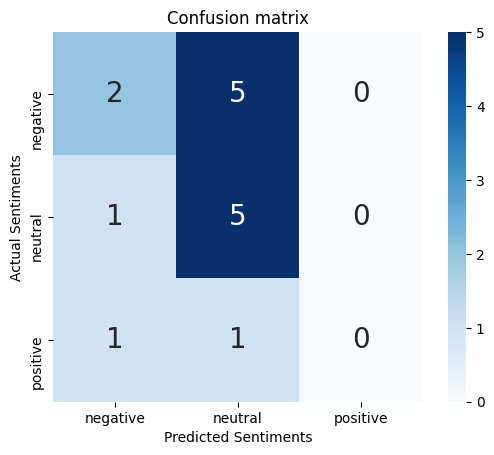

time: 290 ms (started: 2021-05-05 08:01:33 +00:00)


In [46]:
# Fit the first KNN model
knn = KNeighborsClassifier(3)
knn.fit(x_train_cv1, y_train)

y_pred_cv1_knn = knn.predict(x_test_cv1)

confusion = confusion_matrix(y_test, y_pred_cv1_knn)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

accuracy = accuracy_score(y_test, y_pred_cv1_knn)
f1 = f1_score(y_test, y_pred_cv1_knn,average='weighted')
precision = precision_score(y_test, y_pred_cv1_knn,average='weighted')
recall = recall_score(y_test, y_pred_cv1_knn,average='weighted')
cm5 = [accuracy, precision, recall, f1]
# print("Accuracy: {:.2%}".format(accuracy))
# print("Precision: {:.2%}".format(precision))
# print("Recall: {:.2%}".format(recall))
# print("F1 Score: {:.2%}".format(f1))

In [47]:
# import pickle
# pickle.dump(clf,open('KNeighbors_model.p','wb'))

time: 852 µs (started: 2021-05-05 08:01:35 +00:00)


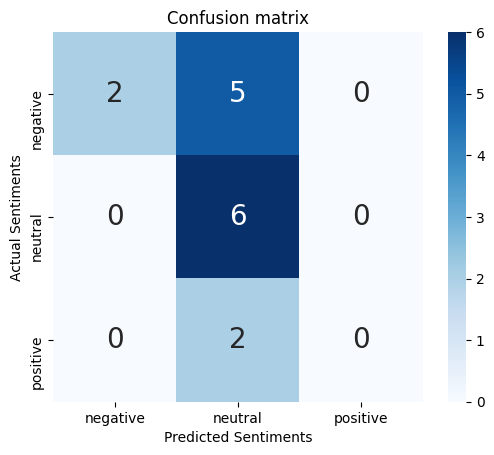

Accuracy: 53.33%
Precision: 65.13%
Recall: 53.33%
F1 Score: 46.00%
time: 277 ms (started: 2021-05-05 08:01:37 +00:00)


In [48]:
# Fit the second KNN model
knn = KNeighborsClassifier(3)
knn.fit(x_train_cv2, y_train)

y_pred_cv2_knn = knn.predict(x_test_cv2)

confusion = confusion_matrix(y_test, y_pred_cv2_knn)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

accuracy = accuracy_score(y_test, y_pred_cv2_knn)
f1 = f1_score(y_test, y_pred_cv2_knn,average='weighted')
precision = precision_score(y_test, y_pred_cv2_knn,average='weighted')
recall = recall_score(y_test, y_pred_cv2_knn,average='weighted')
cm6 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))

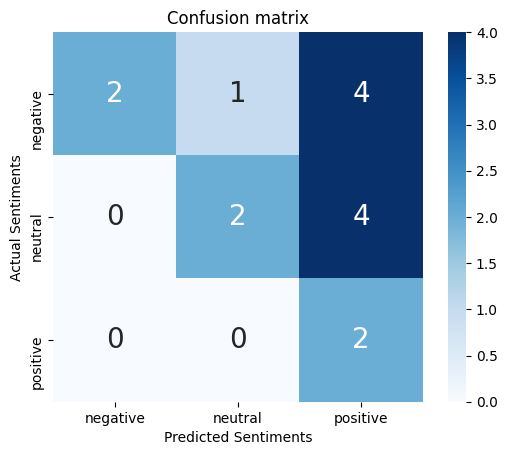

Accuracy: 40.00%
Precision: 76.00%
Recall: 40.00%
F1 Score: 42.96%
time: 290 ms (started: 2021-05-05 08:01:38 +00:00)


In [49]:
# Fit the first DecisionTree model
dt = DecisionTreeClassifier()
dt.fit(x_train_cv1, y_train)

y_pred_cv1_dt = dt.predict(x_test_cv1)

confusion = confusion_matrix(y_test, y_pred_cv1_dt)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

accuracy = accuracy_score(y_test, y_pred_cv1_dt)
f1 = f1_score(y_test, y_pred_cv1_dt,average='weighted')
precision = precision_score(y_test, y_pred_cv1_dt,average='weighted')
recall = recall_score(y_test, y_pred_cv1_dt,average='weighted')
cm7 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))

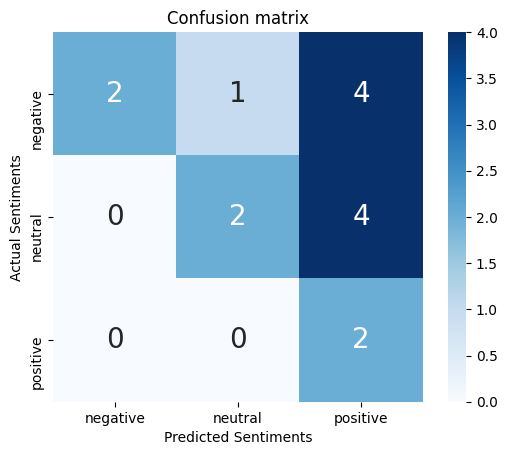

Accuracy: 40.00%
Precision: 76.00%
Recall: 40.00%
F1 Score: 42.96%
time: 259 ms (started: 2021-05-05 08:01:39 +00:00)


In [50]:
# Fit the second Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(x_train_cv2, y_train)

y_pred_cv2_dt = dt.predict(x_test_cv2)

confusion = confusion_matrix(y_test, y_pred_cv2_dt)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

accuracy = accuracy_score(y_test, y_pred_cv2_dt)
f1 = f1_score(y_test, y_pred_cv2_dt,average='weighted')
precision = precision_score(y_test, y_pred_cv2_dt,average='weighted')
recall = recall_score(y_test, y_pred_cv2_dt,average='weighted')
cm8 = [accuracy, precision, recall, f1]
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))

In [73]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
    ]

log_cols=["Classifier","Methods", "Accuracy", "Precision","Recall","F1Score",]
log1 = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(x_train_cv1, y_train)
    name = clf.__class__.__name__
    
    #print("="*30)
    #print(name)
    
    train_predictions = clf.predict(x_test_cv1)
    accuracy = accuracy_score(y_test, train_predictions)
    f1 = f1_score(y_test, train_predictions,average='weighted')
    precision = precision_score(y_test, train_predictions,average='weighted')
    recall = recall_score(y_test, train_predictions,average='weighted')
    #print("Accuracy: {:.2%}".format(accuracy))
    #print("Precision: {:.2%}".format(precision))
    #print("Recall: {:.2%}".format(recall))
    #print("F1 Score: {:.2%}".format(f1))

    #train_predictions = clf.predict_proba(X_test_cv1)
    #ll = log_loss(y_test, train_predictions)
    #print("Log Loss: {:.2}".format(ll))
    
    log_entry = pd.DataFrame([[name, "CountVectorizer",accuracy*100, precision*100, recall*100,f1*100]], columns=log_cols)
    log1 = log1.append(log_entry)
#print("="*30)
round(log1,3)

,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,CountVectorizer,53.333,66.667,53.333,47.407
0,KNeighborsClassifier,CountVectorizer,46.667,41.515,46.667,40.499
0,DecisionTreeClassifier,CountVectorizer,46.667,76.296,46.667,50.626
0,RandomForestClassifier,CountVectorizer,53.333,65.128,53.333,46.004
0,AdaBoostClassifier,CountVectorizer,40.000,69.524,40.000,45.356
0,GradientBoostingClassifier,CountVectorizer,40.000,37.879,40.000,35.793
0,MultinomialNB,CountVectorizer,46.667,51.111,46.667,43.667
0,BernoulliNB,CountVectorizer,40.000,16.000,40.000,22.857


time: 630 ms (started: 2021-05-05 08:13:46 +00:00)


In [74]:
log1.to_csv('log1.csv',index =False) 

time: 7.1 ms (started: 2021-05-05 08:15:48 +00:00)


In [75]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
    ]

log_cols=["Classifier","Methods", "Accuracy", "Precision","Recall","F1Score",]
log2 = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(x_train_cv2, y_train)
    name = clf.__class__.__name__
    
    #print("="*30)
    #print(name)
    
    train_predictions = clf.predict(x_test_cv2)
    accuracy = accuracy_score(y_test, train_predictions)
    f1 = f1_score(y_test, train_predictions,average='weighted')
    precision = precision_score(y_test, train_predictions,average='weighted')
    recall = recall_score(y_test, train_predictions,average='weighted')
    #print("Accuracy: {:.2%}".format(accuracy))
    #print("Precision: {:.2%}".format(precision))
    #print("Recall: {:.2%}".format(recall))
    #print("F1 Score: {:.2%}".format(f1))

    #train_predictions = clf.predict_proba(X_test_cv1)
    #ll = log_loss(y_test, train_predictions)
    #print("Log Loss: {:.2}".format(ll))
    
    log_entry = pd.DataFrame([[name, "N-grams",accuracy*100, precision*100, recall*100,f1*100]], columns=log_cols)
    log2 = log2.append(log_entry)
#print("="*30)
round(log2,3)

,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,N-grams,53.333,65.128,53.333,46.004
0,KNeighborsClassifier,N-grams,53.333,65.128,53.333,46.004
0,DecisionTreeClassifier,N-grams,40.000,76.481,40.000,47.879
0,RandomForestClassifier,N-grams,53.333,65.128,53.333,46.004
0,AdaBoostClassifier,N-grams,33.333,66.667,33.333,40.741
0,GradientBoostingClassifier,N-grams,53.333,65.128,53.333,46.004
0,MultinomialNB,N-grams,46.667,51.111,46.667,43.667
0,BernoulliNB,N-grams,40.000,16.000,40.000,22.857


time: 674 ms (started: 2021-05-05 08:16:37 +00:00)


In [76]:
log2.to_csv('log2.csv',index =False) 

time: 8.31 ms (started: 2021-05-05 08:17:05 +00:00)


In [53]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise

tfidf1 = TfidfVectorizer(stop_words='english')
x_train_tfidf1 = tfidf1.fit_transform(x_train)
x_test_tfidf1  = tfidf1.transform(x_test)

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
x_train_tfidf2 = tfidf2.fit_transform(x_train)
x_test_tfidf2  = tfidf2.transform(x_test)

time: 28.5 ms (started: 2021-05-05 08:01:41 +00:00)


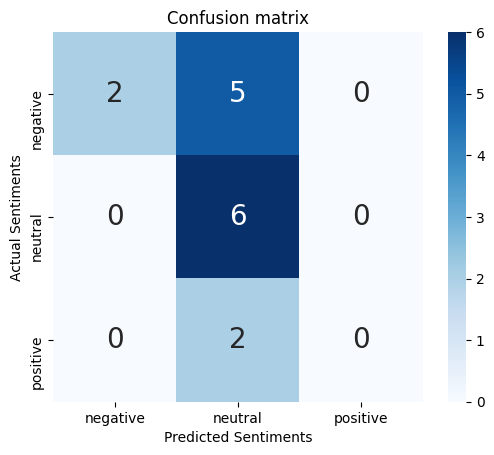

time: 234 ms (started: 2021-05-05 08:01:42 +00:00)


In [54]:
# Fit the first logistic regression on the TF-IDF data
lr.fit(x_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(x_test_tfidf1)
# Here's the heat map for the first Naive Bayes model
confusion = confusion_matrix(y_test, y_pred_tfidf1_lr)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

In [78]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
    ]

log_cols=["Classifier","Methods", "Accuracy", "Precision","Recall","F1Score",]
log3 = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(x_train_tfidf1, y_train)
    name = clf.__class__.__name__
    
    #print("="*30)
    #print(name)
    
    train_predictions = clf.predict(x_test_tfidf1)
    accuracy = accuracy_score(y_test, train_predictions)
    f1 = f1_score(y_test, train_predictions,average='weighted')
    precision = precision_score(y_test, train_predictions,average='weighted')
    recall = recall_score(y_test, train_predictions,average='weighted')
    #print("Accuracy: {:.2%}".format(accuracy))
    #print("Precision: {:.2%}".format(precision))
    #print("Recall: {:.2%}".format(recall))
    #print("F1 Score: {:.2%}".format(f1))

    #train_predictions = clf.predict_proba(X_test_cv1)
    #ll = log_loss(y_test, train_predictions)
    #print("Log Loss: {:.2}".format(ll))
    
    log_entry = pd.DataFrame([[name, "TF-IDF",accuracy*100, precision*100, recall*100,f1*100]], columns=log_cols)
    log3 = log3.append(log_entry)
#print("="*30)
log3 = round(log3,3)
log3

,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,TF-IDF,53.333,65.128,53.333,46.004
0,KNeighborsClassifier,TF-IDF,46.667,46.190,46.667,46.154
0,DecisionTreeClassifier,TF-IDF,40.000,53.333,40.000,40.081
0,RandomForestClassifier,TF-IDF,53.333,65.128,53.333,46.004
0,AdaBoostClassifier,TF-IDF,40.000,53.333,40.000,40.081
0,GradientBoostingClassifier,TF-IDF,40.000,37.879,40.000,35.793
0,MultinomialNB,TF-IDF,53.333,65.128,53.333,46.004
0,BernoulliNB,TF-IDF,40.000,16.000,40.000,22.857


time: 625 ms (started: 2021-05-05 08:19:10 +00:00)


In [79]:
log3.to_csv('log3.csv',index =False) 

time: 3.45 ms (started: 2021-05-05 08:19:24 +00:00)


In [81]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
    ]

log_cols=["Classifier","Methods", "Accuracy", "Precision","Recall","F1Score",]
log4 = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(x_train_tfidf2, y_train)
    name = clf.__class__.__name__
    
    #print("="*30)
    #print(name)
    
    train_predictions = clf.predict(x_test_tfidf2)
    accuracy = accuracy_score(y_test, train_predictions)
    f1 = f1_score(y_test, train_predictions,average='weighted')
    precision = precision_score(y_test, train_predictions,average='weighted')
    recall = recall_score(y_test, train_predictions,average='weighted')
    #print("Accuracy: {:.2%}".format(accuracy))
    #print("Precision: {:.2%}".format(precision))
    #print("Recall: {:.2%}".format(recall))
    #print("F1 Score: {:.2%}".format(f1))

    #train_predictions = clf.predict_proba(X_test_cv1)
    #ll = log_loss(y_test, train_predictions)
    #print("Log Loss: {:.2}".format(ll))
    
    log_entry = pd.DataFrame([[name, "TF-IDF, N-grams",accuracy*100, precision*100, recall*100,f1*100]], columns=log_cols)
    log4 = log4.append(log_entry)
#print("="*30)
log4 = round(log4,3)
log4

,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,"TF-IDF, N-grams",53.333,65.128,53.333,46.004
0,KNeighborsClassifier,"TF-IDF, N-grams",40.000,38.667,40.000,38.413
0,DecisionTreeClassifier,"TF-IDF, N-grams",40.000,53.333,40.000,40.081
0,RandomForestClassifier,"TF-IDF, N-grams",53.333,65.128,53.333,46.004
0,AdaBoostClassifier,"TF-IDF, N-grams",40.000,60.741,40.000,41.293
0,GradientBoostingClassifier,"TF-IDF, N-grams",40.000,37.879,40.000,35.793
0,MultinomialNB,"TF-IDF, N-grams",53.333,65.128,53.333,46.004
0,BernoulliNB,"TF-IDF, N-grams",40.000,16.000,40.000,22.857


time: 689 ms (started: 2021-05-05 08:20:35 +00:00)


In [82]:
log4.to_csv('log4.csv',index =False) 

time: 7.62 ms (started: 2021-05-05 08:20:51 +00:00)


In [83]:
# Compile all of the error metrics into a dataframe for comparison
result = pd.concat([log1,log2,log3,log4],axis=0)
result

,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,CountVectorizer,53.333333,66.666667,53.333333,47.407407
0,KNeighborsClassifier,CountVectorizer,46.666667,41.515152,46.666667,40.499109
0,DecisionTreeClassifier,CountVectorizer,46.666667,76.296296,46.666667,50.626263
0,RandomForestClassifier,CountVectorizer,53.333333,65.128205,53.333333,46.003899
0,AdaBoostClassifier,CountVectorizer,40.000000,69.523810,40.000000,45.356125
0,GradientBoostingClassifier,CountVectorizer,40.000000,37.878788,40.000000,35.793226
0,MultinomialNB,CountVectorizer,46.666667,51.111111,46.666667,43.666667
0,BernoulliNB,CountVectorizer,40.000000,16.000000,40.000000,22.857143
0,LogisticRegression,N-grams,53.333333,65.128205,53.333333,46.003899
0,KNeighborsClassifier,N-grams,53.333333,65.128205,53.333333,46.003899


time: 36 ms (started: 2021-05-05 08:21:06 +00:00)


In [58]:
result["CM"]=result["Classifier"] +" "+ result["Methods"]
result.groupby("Classifier").mean()

,Accuracy,Precision,Recall,F1Score
Classifier,,,,
AdaBoostClassifier,35.000000,59.547619,35.000000,41.524217
BernoulliNB,40.000000,16.000000,40.000000,22.857143
DecisionTreeClassifier,36.666667,62.166667,36.666667,41.200337
GradientBoostingClassifier,43.333333,45.862859,43.333333,39.267463
KNeighborsClassifier,46.666667,47.875125,46.666667,42.767388
LogisticRegression,53.333333,65.512821,53.333333,46.354776
MultinomialNB,50.000000,58.119658,50.000000,44.835283
RandomForestClassifier,53.333333,65.128205,53.333333,46.003899


time: 28.1 ms (started: 2021-05-05 08:01:45 +00:00)


In [59]:
result.sort_values("Accuracy",ascending=False).head(5)


,Classifier,Methods,Accuracy,Precision,Recall,F1Score,CM
0,LogisticRegression,CountVectorizer,53.333333,66.666667,53.333333,47.407407,LogisticRegression CountVectorizer
0,KNeighborsClassifier,N-grams,53.333333,65.128205,53.333333,46.003899,KNeighborsClassifier N-grams
0,MultinomialNB,"TF-IDF, N-grams",53.333333,65.128205,53.333333,46.003899,"MultinomialNB TF-IDF, N-grams"
0,RandomForestClassifier,"TF-IDF, N-grams",53.333333,65.128205,53.333333,46.003899,"RandomForestClassifier TF-IDF, N-grams"
0,LogisticRegression,"TF-IDF, N-grams",53.333333,65.128205,53.333333,46.003899,"LogisticRegression TF-IDF, N-grams"


time: 23.2 ms (started: 2021-05-05 08:01:46 +00:00)


In [60]:
result.sort_values("Precision",ascending=False).head(5)

,Classifier,Methods,Accuracy,Precision,Recall,F1Score,CM
0,DecisionTreeClassifier,N-grams,46.666667,89.333333,46.666667,52.444444,DecisionTreeClassifier N-grams
0,DecisionTreeClassifier,CountVectorizer,40.000000,76.000000,40.000000,42.962963,DecisionTreeClassifier CountVectorizer
0,AdaBoostClassifier,CountVectorizer,40.000000,69.523810,40.000000,45.356125,AdaBoostClassifier CountVectorizer
0,LogisticRegression,CountVectorizer,53.333333,66.666667,53.333333,47.407407,LogisticRegression CountVectorizer
0,AdaBoostClassifier,N-grams,33.333333,66.666667,33.333333,40.740741,AdaBoostClassifier N-grams


time: 32.6 ms (started: 2021-05-05 08:01:47 +00:00)


In [61]:
result.sort_values("Recall",ascending=False).head(5)


,Classifier,Methods,Accuracy,Precision,Recall,F1Score,CM
0,LogisticRegression,CountVectorizer,53.333333,66.666667,53.333333,47.407407,LogisticRegression CountVectorizer
0,KNeighborsClassifier,N-grams,53.333333,65.128205,53.333333,46.003899,KNeighborsClassifier N-grams
0,MultinomialNB,"TF-IDF, N-grams",53.333333,65.128205,53.333333,46.003899,"MultinomialNB TF-IDF, N-grams"
0,RandomForestClassifier,"TF-IDF, N-grams",53.333333,65.128205,53.333333,46.003899,"RandomForestClassifier TF-IDF, N-grams"
0,LogisticRegression,"TF-IDF, N-grams",53.333333,65.128205,53.333333,46.003899,"LogisticRegression TF-IDF, N-grams"


time: 25.7 ms (started: 2021-05-05 08:01:48 +00:00)


In [62]:
result.sort_values("F1Score",ascending=False).head(5)


,Classifier,Methods,Accuracy,Precision,Recall,F1Score,CM
0,DecisionTreeClassifier,N-grams,46.666667,89.333333,46.666667,52.444444,DecisionTreeClassifier N-grams
0,LogisticRegression,CountVectorizer,53.333333,66.666667,53.333333,47.407407,LogisticRegression CountVectorizer
0,KNeighborsClassifier,TF-IDF,46.666667,46.190476,46.666667,46.153846,KNeighborsClassifier TF-IDF
0,MultinomialNB,"TF-IDF, N-grams",53.333333,65.128205,53.333333,46.003899,"MultinomialNB TF-IDF, N-grams"
0,RandomForestClassifier,"TF-IDF, N-grams",53.333333,65.128205,53.333333,46.003899,"RandomForestClassifier TF-IDF, N-grams"


time: 24.9 ms (started: 2021-05-05 08:01:49 +00:00)


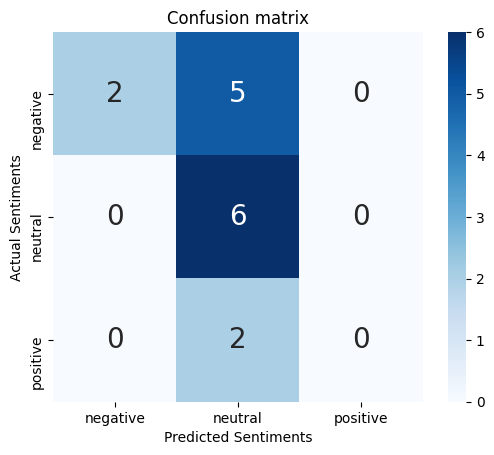

Accuracy: 53.33%
Precision: 65.13%
Recall: 53.33%
F1 Score: 46.00%
time: 267 ms (started: 2021-05-05 08:01:49 +00:00)


In [63]:
# Train the final model
lr = LogisticRegression()
lr.fit(x_train_cv2, y_train)
y_pred_cv2 = lr.predict(x_test_cv2)


# Print confusion matrix for logistic
confusion = confusion_matrix(y_test, y_pred_cv2)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'neutral','positive'],
            yticklabels=['negative', 'neutral','positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.show()

# Print Sklearn Metrices
accuracy = accuracy_score(y_test, y_pred_cv2)
f1 = f1_score(y_test, y_pred_cv2,average='weighted')
precision = precision_score(y_test, y_pred_cv2,average='weighted')
recall = recall_score(y_test, y_pred_cv2,average='weighted')
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))

In [64]:
scores1 = cross_val_score(LogisticRegression(), x_train_cv2, y_train, cv=10, scoring="accuracy")
#scores2 = cross_val_score(LogisticRegression(), x_train_cv2, y_train, cv=10, scoring="recall",average='micro')
#scores3 = cross_val_score(LogisticRegression(), x_train_cv2, y_train, cv=10, scoring="precision",average='weighted')
#scores4 = cross_val_score(LogisticRegression(), x_train_cv2, y_train, cv=10, scoring="f1_macro",average='weighted')

print("Mean Accuracy: ", scores1.mean())
#print("Mean Precision: ", scores3.mean())
#print("Mean Recall: ", scores2.mean())
#print("Mean F1 Score: ", scores4.mean())

Mean Accuracy:  0.555
time: 151 ms (started: 2021-05-05 08:01:50 +00:00)


<Figure size 1200x800 with 0 Axes>

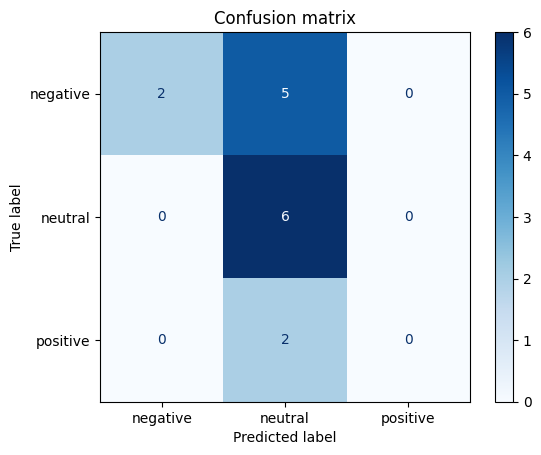

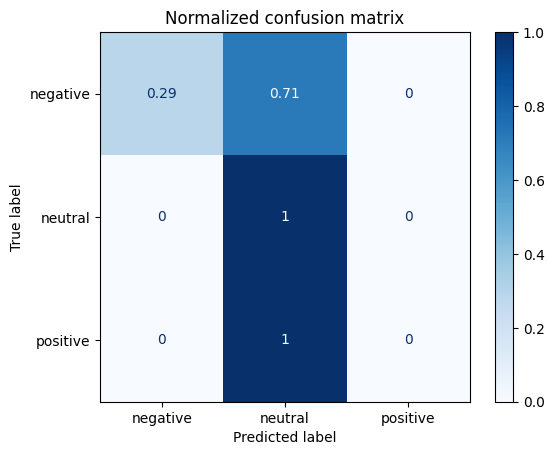

time: 456 ms (started: 2021-05-05 08:02:05 +00:00)


In [65]:
classifier = LogisticRegression().fit(x_train_cv2, y_train)

np.set_printoptions(precision=2)
plt.figure(figsize=(15,10),dpi=80),
plt.style.use('default')

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test_cv2, y_test,
                                 display_labels=['negative', 'neutral','positive'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

In [ ]:
# Filtrate csv file
df.to_csv('filtrate.csv',index =False) 

In [66]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 576kB/s 
     |████████████████████████████████| 163kB 31.1MB/s 
     |████████████████████████████████| 81kB 5.8MB/s 
     |████████████████████████████████| 4.2MB 32.8MB/s 
     |████████████████████████████████| 112kB 47.2MB/s 
     |████████████████████████████████| 71kB 5.5MB/s 
     |████████████████████████████████| 122kB 48.6MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.
time: 19.8 s (started: 2021-05-05 08:02:10 +00:00)


In [88]:
%%writefile app.py

import streamlit as st
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os
import nltk
import contractions
import re
from nltk.tokenize.toktok import ToktokTokenizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")


from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# import datetimet

vs = SentimentIntensityAnalyzer()

def main():
  st.title("SENTIMENT ANALYSIS")

  def load_data():
    df = pd.read_csv('https://raw.githubusercontent.com/aarati0122/Datasets/main/news.csv')
    filtrate_data = pd.read_csv('https://raw.githubusercontent.com/aarati0122/Datasets/main/filtrate.csv')
    return df,filtrate_data
  
  def split(df):
    df = dataframe(df)
    x = df.news_article
    y = df.sentiment
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=0)
    return xtrain, xtest, ytrain, ytest
  def dataframe(df):
    df.loc[df['compound'] > -0.05 , 'sentiment'] = 'neutral' 
    df.loc[df['compound'] <= -0.05, 'sentiment'] = 'negative' 
    df.loc[df['compound'] >= 0.05, 'sentiment'] = 'positive' 
    df = df[["news_headline","news_article","sentiment","compound"]]
    return df

  def piechart(df):
    positive = len(df[df["sentiment"]=="positive"])
    negative = len(df[df["sentiment"]=="negative"])
    neutral = len(df[df["sentiment"]=="neutral"])
    pie_sentiment = df.sentiment.value_counts(normalize=True)
    plt.figure(figsize=(2,2),dpi=10)
    labels = 'Positive','Negative',"Neutral"
    colors = ['yellowgreen', 'red','gold']
    plt.pie(pie_sentiment, colors=colors,labels=labels,autopct='%1.1f%%')
    plt.style.use('default')
    plt.axis('equal')
    sizes = [positive, neutral, negative]
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.pyplot()

  def unigram_cv():
    x_train, x_test, y_train, y_test = split(filtrate)
    cv1 = CountVectorizer(stop_words='english')

    x_train_cv1 = cv1.fit_transform(x_train)
    x_test_cv1  = cv1.transform(x_test)

    ug_cv = pd.DataFrame(x_train_cv1.toarray(), columns=cv1.get_feature_names()).sample(10)
    return x_train_cv1,x_test_cv1

  def bigram_cv():
    x_train, x_test, y_train, y_test = split(filtrate)
    cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
    x_train_cv2 = cv2.fit_transform(x_train)
    x_test_cv2  = cv2.transform(x_test)
    big_cv = pd.DataFrame(x_train_cv2.toarray(), columns=cv2.get_feature_names()).head()
    return x_train_cv2,x_test_cv2

  def logisticReg_KNN1():
    x_train_cv1,x_test_cv1 =unigram_cv()
    lr = LogisticRegression()
      # Train the first model
    lr.fit(x_train_cv1, y_train)
    y_pred_cv1 = lr.predict(x_test_cv1)
    confusion = confusion_matrix(y_test, y_pred_cv1)
    plt.figure(dpi=100)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
                  xticklabels=['negative', 'neutral','positive'],
                  yticklabels=['negative', 'neutral','positive'],
                  fmt='d', annot_kws={'fontsize':20})
    plt.xticks(rotation=0)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted Sentiments')
    plt.ylabel('Actual Sentiments')
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.pyplot()
    accuracy = accuracy_score(y_test, y_pred_cv1)
    f1 = f1_score(y_test, y_pred_cv1,average='weighted')
    precision = precision_score(y_test, y_pred_cv1,average='weighted')
    recall = recall_score(y_test, y_pred_cv1,average='weighted')
    cm1 = [accuracy, precision, recall, f1]
    st.write("Accuracy: {:.2%}".format(accuracy))
    st.write("Precision: {:.2%}".format(precision))
    st.write("Recall: {:.2%}".format(recall))
    st.write("F1 Score: {:.2%}".format(f1))
    return cm1
  

  def logisticReg_KNN2():
     # Train the second model
    x_train_cv2,x_test_cv2 =bigram_cv()
    lr = LogisticRegression()
    lr.fit(x_train_cv2, y_train)
    y_pred_cv2 = lr.predict(x_test_cv2)


      # Print confusion matrix for kNN
    confusion = confusion_matrix(y_test, y_pred_cv2)
    plt.figure(dpi=100)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
                  xticklabels=['negative', 'neutral','positive'],
                  yticklabels=['negative', 'neutral','positive'],
                  fmt='d', annot_kws={'fontsize':20})
    plt.xticks(rotation=0)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted Sentiments')
    plt.ylabel('Actual Sentiments')
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.pyplot()

      # Print Sklearn Metrices
    accuracy = accuracy_score(y_test, y_pred_cv2)
    f1 = f1_score(y_test, y_pred_cv2,average='weighted')
    precision = precision_score(y_test, y_pred_cv2,average='weighted')
    recall = recall_score(y_test, y_pred_cv2,average='weighted')
    cm2 = [accuracy, precision, recall, f1]
    st.write("Accuracy: {:.2%}".format(accuracy))
    st.write("Precision: {:.2%}".format(precision))
    st.write("Recall: {:.2%}".format(recall))
    st.write("F1 Score: {:.2%}".format(f1))
    return cm2
    
  def naive_bayes1():
    # Fit the first Naive Bayes model
    x_train_cv1,x_test_cv1 =unigram_cv()
    mnb = MultinomialNB()
    mnb.fit(x_train_cv1, y_train)
    y_pred_cv1_nb = mnb.predict(x_test_cv1)

    # Print confusion matrix for kNN
    confusion = confusion_matrix(y_test, y_pred_cv1_nb)
    plt.figure(dpi=100)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
                xticklabels=['negative', 'neutral','positive'],
                yticklabels=['negative', 'neutral','positive'],
                fmt='d', annot_kws={'fontsize':20})
    plt.xticks(rotation=0)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted Sentiments')
    plt.ylabel('Actual Sentiments')
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.pyplot()

    # Print Sklearn Metrices
    accuracy = accuracy_score(y_test, y_pred_cv1_nb)
    f1 = f1_score(y_test, y_pred_cv1_nb,average='weighted')
    precision = precision_score(y_test, y_pred_cv1_nb,average='weighted')
    recall = recall_score(y_test, y_pred_cv1_nb,average='weighted')
    cm3 = [accuracy, precision, recall, f1]
    # st.write("Accuracy: {:.2%}".format(accuracy))
    # st.write("Precision: {:.2%}".format(precision))
    # st.write("Recall: {:.2%}".format(recall))
    # st.write("F1 Score: {:.2%}".format(f1))
    return cm3

  def naive_bayes2():
    # Fit the second Naive Bayes model
    x_train_cv2,x_test_cv2 =bigram_cv()
    mnb = MultinomialNB()
    mnb.fit(x_train_cv2, y_train)

    y_pred_cv2_nb = mnb.predict(x_test_cv2)

    confusion = confusion_matrix(y_test, y_pred_cv2_nb)
    plt.figure(dpi=100)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
                  xticklabels=['negative', 'neutral','positive'],
                  yticklabels=['negative', 'neutral','positive'],
                  fmt='d', annot_kws={'fontsize':20})
    plt.xticks(rotation=0)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted Sentiments')
    plt.ylabel('Actual Sentiments')
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.pyplot()

    accuracy = accuracy_score(y_test, y_pred_cv2_nb)
    f1 = f1_score(y_test, y_pred_cv2_nb,average='weighted')
    precision = precision_score(y_test, y_pred_cv2_nb,average='weighted')
    recall = recall_score(y_test, y_pred_cv2_nb,average='weighted')
    cm4 = [accuracy, precision, recall, f1]
    st.write("Accuracy: {:.2%}".format(accuracy))
    st.write("Precision: {:.2%}".format(precision))
    st.write("Recall: {:.2%}".format(recall))
    st.write("F1 Score: {:.2%}".format(f1))
    return cm4

  def KNeighbors1():
    # Fit the first KNN model
    x_train_cv1,x_test_cv1 =unigram_cv()
    knn = KNeighborsClassifier(3)
    knn.fit(x_train_cv1, y_train)

    y_pred_cv1_knn = knn.predict(x_test_cv1)

    confusion = confusion_matrix(y_test, y_pred_cv1_knn)
    plt.figure(dpi=100)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
                xticklabels=['negative', 'neutral','positive'],
                yticklabels=['negative', 'neutral','positive'],
                fmt='d', annot_kws={'fontsize':20})
    plt.xticks(rotation=0)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted Sentiments')
    plt.ylabel('Actual Sentiments')
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.pyplot()

    accuracy = accuracy_score(y_test, y_pred_cv1_knn)
    f1 = f1_score(y_test, y_pred_cv1_knn,average='weighted')
    precision = precision_score(y_test, y_pred_cv1_knn,average='weighted')
    recall = recall_score(y_test, y_pred_cv1_knn,average='weighted')
    cm5 = [accuracy, precision, recall, f1]
    st.write("Accuracy: {:.2%}".format(accuracy))
    st.write("Precision: {:.2%}".format(precision))
    st.write("Recall: {:.2%}".format(recall))
    st.write("F1 Score: {:.2%}".format(f1))
    return cm5

  def KNeighbors2():
    # Fit the second KNN model
    x_train_cv2,x_test_cv2 =bigram_cv()
    knn = KNeighborsClassifier(3)
    knn.fit(x_train_cv2, y_train)

    y_pred_cv2_knn = knn.predict(x_test_cv2)

    confusion = confusion_matrix(y_test, y_pred_cv2_knn)
    plt.figure(dpi=100)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
                xticklabels=['negative', 'neutral','positive'],
                yticklabels=['negative', 'neutral','positive'],
                fmt='d', annot_kws={'fontsize':20})
    plt.xticks(rotation=0)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted Sentiments')
    plt.ylabel('Actual Sentiments')
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.pyplot()

    accuracy = accuracy_score(y_test, y_pred_cv2_knn)
    f1 = f1_score(y_test, y_pred_cv2_knn,average='weighted')
    precision = precision_score(y_test, y_pred_cv2_knn,average='weighted')
    recall = recall_score(y_test, y_pred_cv2_knn,average='weighted')
    cm6 = [accuracy, precision, recall, f1]
    print("Accuracy: {:.2%}".format(accuracy))
    print("Precision: {:.2%}".format(precision))
    print("Recall: {:.2%}".format(recall))
    print("F1 Score: {:.2%}".format(f1))
    return cm6

  def DecisionTree1():
    x_train_cv1,x_test_cv1 =unigram_cv()
    dt = DecisionTreeClassifier()
    dt.fit(x_train_cv1, y_train)

    y_pred_cv1_dt = dt.predict(x_test_cv1)

    confusion = confusion_matrix(y_test, y_pred_cv1_dt)
    plt.figure(dpi=100)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
                xticklabels=['negative', 'neutral','positive'],
                yticklabels=['negative', 'neutral','positive'],
                fmt='d', annot_kws={'fontsize':20})
    plt.xticks(rotation=0)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted Sentiments')
    plt.ylabel('Actual Sentiments')
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.pyplot()

    accuracy = accuracy_score(y_test, y_pred_cv1_dt)
    f1 = f1_score(y_test, y_pred_cv1_dt,average='weighted')
    precision = precision_score(y_test, y_pred_cv1_dt,average='weighted')
    recall = recall_score(y_test, y_pred_cv1_dt,average='weighted')
    cm7 = [accuracy, precision, recall, f1]
    st.write("Accuracy: {:.2%}".format(accuracy))
    st.write("Precision: {:.2%}".format(precision))
    st.write("Recall: {:.2%}".format(recall))
    st.write("F1 Score: {:.2%}".format(f1))
    return cm7

  def DecisionTree2():
    x_train_cv2,x_test_cv2 =bigram_cv()
    dt = DecisionTreeClassifier()
    dt.fit(x_train_cv2, y_train)

    y_pred_cv2_dt = dt.predict(x_test_cv2)

    confusion = confusion_matrix(y_test, y_pred_cv2_dt)
    plt.figure(dpi=100)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
                xticklabels=['negative', 'neutral','positive'],
                yticklabels=['negative', 'neutral','positive'],
                fmt='d', annot_kws={'fontsize':20})
    plt.xticks(rotation=0)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted Sentiments')
    plt.ylabel('Actual Sentiments')
    st.pyplot()

    accuracy = accuracy_score(y_test, y_pred_cv2_dt)
    f1 = f1_score(y_test, y_pred_cv2_dt,average='weighted')
    precision = precision_score(y_test, y_pred_cv2_dt,average='weighted')
    recall = recall_score(y_test, y_pred_cv2_dt,average='weighted')
    cm8 = [accuracy, precision, recall, f1]
    st.write("Accuracy: {:.2%}".format(accuracy))
    st.write("Precision: {:.2%}".format(precision))
    st.write("Recall: {:.2%}".format(recall))
    st.write("F1 Score: {:.2%}".format(f1))
    return cm8

  def logs():
    log_file = st.selectbox("What logs do you want to see",("Select the Options","Log1","Log2","Log3","Log4"))
    if "Log1" in log_file:
      log1 = pd.read_csv("https://raw.githubusercontent.com/aarati0122/Sentiment-Analysis/main/log1.csv")
      st.write(log1)
    if "Log2" in log_file:
      log2 = pd.read_csv("https://raw.githubusercontent.com/aarati0122/Sentiment-Analysis/main/log2.csv")
      st.write(log2)
    if "Log3" in log_file:
      log3 = pd.read_csv("https://raw.githubusercontent.com/aarati0122/Sentiment-Analysis/main/log3.csv")
      st.write(log3)
    if "Log4" in log_file:
      log4 = pd.read_csv("https://raw.githubusercontent.com/aarati0122/Sentiment-Analysis/main/log4.csv")
      st.write(log4)
  
    


  data,filtrate = load_data()
  x_train, x_test, y_train, y_test = split(filtrate)


  dataset = st.sidebar.selectbox("Dataset",("select the option","Without Filtrate Dataset",
                                            "With Filtrate Dataset","Sentiments","Logs of Sentiments"))
  if dataset  == "Without Filtrate Dataset":
    st.subheader("Dataset from web scraping")
    st.write(data)
  
  if dataset  == "With Filtrate Dataset":
    st.subheader("Filtrated Data")
    st.write(filtrate)
  
  if dataset  == "Sentiments":
    data_fil = st.sidebar.checkbox("Sentiments")
    sentiment = dataframe(filtrate)
    if(data_fil):
      st.subheader("Adding the sentiments")
      st.write(sentiment)
     
    ch = st.sidebar.checkbox("Pie chart of Sentiment Analysis")
    if(ch):
      st.subheader('Sentiment Rate for web scrapng data')
      chart = piechart(sentiment)
      st.write("Total records: ",len(sentiment))
      st.write("Train records: ",len(x_train))
      st.write("Test records : ",len(x_test))
      st.write(chart)

  if dataset == "Logs of Sentiments":
      logs()

  regression = st.sidebar.selectbox("Regression",("select regression","Logistic Regression","MultinomialNB","KNeighbors Classifier"
                  ,"DecisionTree Classifier","Normalized confusion matrix"))

  if regression == "Logistic Regression":
    # Create a logistic regression model to use
    cv1 = st.sidebar.checkbox("Countvector for 1st train Model for Logistic Regression")
    if(cv1):
      logisticReg_KNN1()

    cv2 = st.sidebar.checkbox("Countvector for 2nd train Model for Logistic Regression")
    if(cv2):
      logisticReg_KNN2()
     
    
    campare = st.sidebar.checkbox('Compile all of the error metrics into a dataframe for comparison')
    if(campare):
    # Compile all of the error metrics into a dataframe for comparison
      cm1 = logisticReg_KNN1()
      cm2 =  logisticReg_KNN2()
      results = pd.DataFrame(list(zip(cm1, cm2)))
      results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
      results.columns = ['LR1-CV', 'LR2-CV-Ngr']
      st.write(round(results,3))

  if regression == "MultinomialNB":
    cv1 = st.sidebar.checkbox("MultinomialNB 1")
    if(cv1):
      naive_bayes1()
    
    cv2 = st.sidebar.checkbox("MultinomialNB 2")
    if(cv2):
      naive_bayes2()

    campare = st.sidebar.checkbox("Compile all of the error metrics into a dataframe for comparison")
    if(campare):
      cm3 = naive_bayes1()
      cm4 = naive_bayes2()
      results_nb = pd.DataFrame(list(zip(cm3, cm4)))
      results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
      results_nb.columns = ['NB1-CV', 'NB2-CV-Ngr']
      results_nb
      results = pd.concat([results, results_nb], axis=1)
      st.write(results)
  if regression == "KNeighbors Classifier":
    cv1 = st.sidebar.checkbox("KNeighbors Classifier 1")
    if(cv1):
      KNeighbors1()
    cv2 = st.sidebar.checkbox("KNeighbors Classifier 2")
    if(cv2):
      KNeighbors1()
  
  if regression == "DecisionTree Classifier":
    cv1 = st.sidebar.checkbox("DecisionTree Classifier 1")
    if(cv1):
      DecisionTree1()
    cv2 = st.sidebar.checkbox("DecisionTree Classifier 2")
    if(cv2):
      DecisionTree2()
  if regression == "Normalized confusion matrix":
    x_train_cv2,x_test_cv2 =bigram_cv()
    classifier = LogisticRegression().fit(x_train_cv2, y_train)

    np.set_printoptions(precision=2)
    plt.figure(figsize=(15,10),dpi=80),
    plt.style.use('default')

    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, x_test_cv2, y_test,
                                    display_labels=['negative', 'neutral','positive'],
                                    cmap=plt.cm.Blues,
                                    normalize=normalize)
        disp.ax_.set_title(title)

    st.pyplot()
if __name__ == '__main__':
  main()

Overwriting app.py
time: 16.6 ms (started: 2021-05-05 08:54:10 +00:00)


In [68]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://48624a5c4599.ngrok.io'

time: 1.73 s (started: 2021-05-05 08:02:36 +00:00)


In [ ]:
# def remove_stopword():
#     nltk.download('stopwords')
#     stopword_list = nltk.corpus.stopwords.words('english')
#     stopword_list.remove("not")
#     len(stopword_list)
  
#   def html_tag(text):
#     soup = BeautifulSoup(text,"html.parser")
#     new_text =soup.get_text()
#     return new_text

#   def con(text):
#     expand = contractions.fix(text)
#     return expand

#   def remove_sp(text):
#     pattern = r'[^A-Za-z0-9\s]'
#     text = re.sub(pattern,'',text)
#     return text

#   def remove_stopword(text):
#     tokenizer = ToktokTokenizer()
#     tokens = tokenizer.tokenize(text)
#     tokens = [token.strip() for token in tokens]
#     filtered_tokens =[token for token in tokens if token not in stopword_list]
#     filtered_text = ' '.join(filtered_tokens)
#     return tokens
